In [1]:
import pandas as pd
val = pd.read_csv("test_data.csv")
train = pd.read_csv("train_data.csv")
val.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1701,1,1.6,1,3,0,10,0.3,194,8,...,550,1338,2598,12,9,6,0,1,0,2
1,1484,0,3.0,0,3,0,12,0.6,134,3,...,916,969,1457,14,4,20,1,1,0,1
2,555,1,0.5,1,2,0,17,0.2,163,5,...,956,1010,343,19,14,3,0,1,1,0
3,586,0,2.8,0,2,0,15,0.2,83,3,...,241,854,2592,12,8,3,0,0,0,1
4,980,1,0.5,0,0,1,33,0.9,160,6,...,1008,1758,2268,7,5,4,1,1,0,2


In [2]:
val.select_dtypes(include=['object']).columns  # no object/text/categorical data

Index([], dtype='object')

In [3]:
val.select_dtypes(include=['number']).columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

    1. EDA

In [4]:
print(train.head())
print(train.tail())

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0           1938     1          0.5         1   5       0          44    0.5   
1           1831     0          1.4         1   2       0          43    0.9   
2            763     0          1.7         1   8       1           2    0.5   
3            851     0          0.5         0   3       0          21    0.4   
4            712     0          0.5         0   6       0          27    0.5   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        121        2  ...       1299      1935  3497    18    10         18   
1        150        5  ...        611      1381  3834    17     7         13   
2         92        8  ...       1028      1186  1050     6     4          8   
3        200        5  ...       1171      1263   478    12     7         10   
4         86        2  ...       1245      1309  2001    11    10         12   

   three_g  touch_screen  wifi  price_

In [5]:
print(train.shape)
print(train.dtypes)

(1800, 21)
battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object


In [6]:
print(train.describe())
print(train.describe())
print(train.nunique())

       battery_power         blue  clock_speed     dual_sim           fc  \
count    1800.000000  1800.000000  1800.000000  1800.000000  1800.000000   
mean     1237.533333     0.499444     1.517944     0.509444     4.342778   
std       440.853947     0.500139     0.813604     0.500050     4.331555   
min       501.000000     0.000000     0.500000     0.000000     0.000000   
25%       848.000000     0.000000     0.700000     0.000000     1.000000   
50%      1224.500000     0.000000     1.500000     1.000000     3.000000   
75%      1617.000000     1.000000     2.200000     1.000000     7.000000   
max      1998.000000     1.000000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  1800.000000  1800.000000  1800.000000  1800.000000  1800.000000  ...   
mean      0.525000    32.197222     0.502778   140.413889     4.523333  ...   
std       0.499513    18.192214     0.289281    35.407189     2.289379  ...   

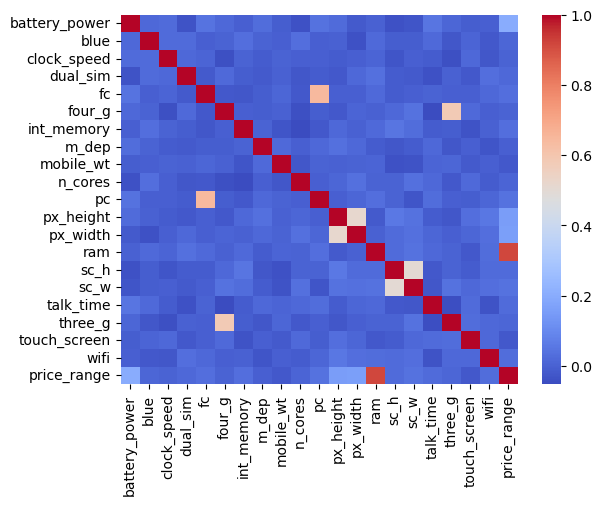

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = train.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm');

In [8]:
train["price_range"]   #Y value

0       3
1       3
2       0
3       0
4       1
       ..
1795    3
1796    1
1797    0
1798    1
1799    2
Name: price_range, Length: 1800, dtype: int64

    2. Splitting data to train and validation, important - список 10 наиболее коррелируемых с 'price_change' столбцов. 

In [9]:
important = list(train.corr()["price_range"].sort_values(ascending=False)[1:11].index)
X_train = train[important]
y_train = train["price_range"]
X_val = val[important]
y_val = val["price_range"]

    3. Дальше с помощью 5 моделей прогнозируем 'price_range' и распечатываем Precision, F1 score and Recall для каждой модели. 

Logistic Regression:

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

reg = LogisticRegression()
reg.fit(X_train_scaled, np.array(y_train))

y_pred = reg.predict(X_val_scaled)

precision = precision_score(y_val, y_pred, average="weighted")

recall = recall_score(y_val, y_pred, average="weighted")

f1 = f1_score(y_val, y_pred, average="weighted")

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.960236013986014
Recall: 0.96
F1 Score: 0.9599719766904168


Random Forest:

In [11]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

precision = precision_score(y_val, y_pred, average='weighted')  # Use 'macro', 'micro', or 'weighted' for multi-class
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Precision: 0.9376545352743559
Recall: 0.935
F1 Score: 0.9354527850019645


SVM:

In [12]:
from sklearn.svm import SVC

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

reg = SVC()
reg.fit(X_train_scaled, y_train)

y_pred = reg.predict(X_val_scaled)

precision = precision_score(y_val, y_pred, average='weighted')  # Use 'macro', 'micro', or 'weighted' for multi-class
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.8915604003359462
Recall: 0.89
F1 Score: 0.8903862379211975


KNN:

In [13]:
from sklearn.neighbors import KNeighborsClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

reg = KNeighborsClassifier()
reg.fit(X_train_scaled, y_train)

y_pred = reg.predict(X_val_scaled)

precision = precision_score(y_val, y_pred, average='weighted')  
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.6913321937834556
Recall: 0.685
F1 Score: 0.6853172831123814


GBM:

In [14]:
from sklearn.ensemble import GradientBoostingClassifier

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)

reg = GradientBoostingClassifier()
reg.fit(X_train_scaled, y_train)

y_pred = reg.predict(X_val_scaled)

precision = precision_score(y_val, y_pred, average='weighted')  
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Precision: 0.9421173469387756
Recall: 0.94
F1 Score: 0.940481045421841


Модели по точности:
1. LOGISTIC REGRESSION
2. GBM
3. RANDOM FOREST
4. SVM
5. KNN